In [2]:
import pandas as pd
import numpy as np

#  plot confusion matrices
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier

import sys
sys.path.insert(1, '../')
from py_oqat.config_algorithms import ACOConfig
from py_oqat.classifier import OQATClassifier

In [2]:
SEED = 42

def pretty_print_confusion_matrix(confusion_matrix):
    for row in confusion_matrix:
        print(row)

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        
    # print(cm)

    df_cm = pd.DataFrame(cm, index = [i for i in classes],
                  columns = [i for i in classes])
    plt.figure(figsize = (7,5))
    sns.heatmap(df_cm, annot=True, cmap=cmap)

    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()



In [3]:
# Load iris dataset from sklearn
from sklearn.datasets import load_wine
wine = load_wine()
X = wine.data
y = wine.target

# Define the feature type for each column (discrete or continuous)
column_names = ["a1", "a2", "a3", "a4", "a5", "a6", "a7", "a8", "a9", "a10", "a11", "a12", "a13"]
column_types = ["num", "num", "num", "num", "num", "num", "num", "num", "num", "num", "num", "num", "num"]

print(X.shape)
print(y.shape)

(178, 13)
(178,)


In [4]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=SEED)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


(71, 13)
(71,)
(107, 13)
(107,)


In [5]:
# Balance the training set

print("Before SMOTE")
print(pd.Series(y_train).value_counts())
# smote = SMOTE()
# X_train, y_train = smote.fit_resample(X_train, y_train)
# print("After SMOTE")
# print(pd.Series(y_train).value_counts())

Before SMOTE
1    28
0    23
2    20
dtype: int64


Decision Tree
[32  4  0]
[ 3 39  1]
[ 5  4 19]
Score:  0.8411214953271028


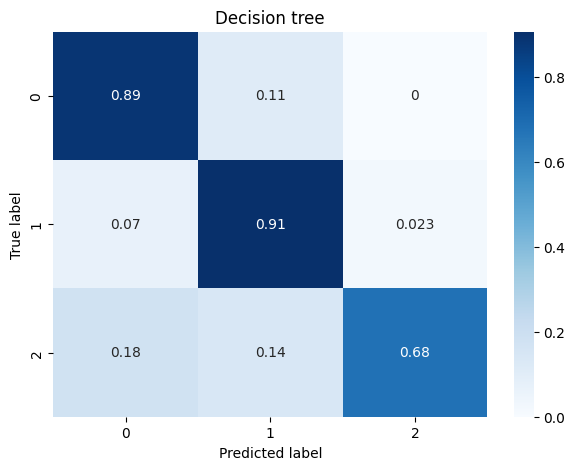

In [6]:
# Run a classification tree algorithm from sklearn
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)
cm_tree = confusion_matrix(y_test, y_pred_tree)
print("Decision Tree")
pretty_print_confusion_matrix(cm_tree)
print("Score: ", tree_model.score(X_test, y_test))
plot_confusion_matrix(cm_tree, classes=['0', '1', '2'], normalize=True, title='Decision tree')
# text_repr = tree.export_text(tree_model)
# print(text_repr)

In [7]:
# # Run the OQAT algorithm
aco_config = ACOConfig(algorithm="vertex-ac", cycles=20, ants=10, alpha=1, rho=0.99, tau_max=6., tau_min=0.01)
classifier = OQATClassifier(collision_strategy="best_score", null_strategy="weighted", heuristic="aco", heuristic_config=aco_config)
classifier.fit(X_train, y_train, column_names, column_types, n_discrete_bins=3)
print(classifier.model)

Model for class 0 created
Score: 0.8636363636363636
Model for class 1 created
Score: 0.9090909090909091
Model for class 2 created
Score: 1.0
{0: {'oqat_model': (([774.81>=a13<1547.00]) ∧ ([13.43>=a1<14.83] ∨ [3.38>=a2<4.72] ∨ [a4<17.35] ∨ [a5<93.84] ∨ [2.14>=a6<2.97] ∨ [3.05>=a7<5.08] ∨ [2.43>=a9<3.58] ∨ [2.22>=a12<3.06] ∨ [1186.37>=a13<1547.00])), 'cnf_weights': [28, 4], 'cnf_weights_norm': [0.875, 0.125], 'score': 0.8636363636363636}, 1: {'oqat_model': (([a1<12.35] ∨ [a3<1.96] ∨ [a5<93.84] ∨ [1.29>=a11<1.71]) ∧ ([a2<2.21] ∨ [a3<1.96] ∨ [2.55>=a3<3.23] ∨ [a4<17.35] ∨ [22.86>=a4<28.50] ∨ [93.84>=a5<126.00] ∨ [2.97>=a6<3.88] ∨ [1.80>=a7<5.08] ∨ [a8<0.31] ∨ [2.43>=a9<3.58] ∨ [4.60>=a10<7.52] ∨ [0.86>=a11<1.71] ∨ [2.22>=a12<3.71] ∨ [774.81>=a13<1186.37]) ∧ ([a1<12.35] ∨ [2.21>=a2<4.72] ∨ [a3<1.96] ∨ [2.55>=a3<3.23] ∨ [17.35>=a4<28.50] ∨ [93.84>=a5<126.00] ∨ [a6<2.14] ∨ [a7<3.05] ∨ [0.46>=a8<0.63] ∨ [a9<2.43] ∨ [a10<4.60] ∨ [a11<0.86] ∨ [1.29>=a11<1.71] ∨ [a12<2.22] ∨ [3.06>=a12<3.71] ∨ [a

In [8]:
classifier.collision_strategy = "None"
classifier.null_strategy = "None"
y_pred_set = classifier.predict(X_test, column_names)
print(y_pred_set)

[0, 0, -1, 0, 1, 0, 1, 2, 1, [0, 1], 0, 2, [0, 1], [1, 2], 0, 1, 1, 1, 0, 1, -1, 1, 1, 2, 2, 2, -1, -1, 1, 0, 0, 1, [0, 2], 0, [0, 1], 0, 2, 2, 1, [1, 2], 0, 1, -1, 2, [1, 2], 0, 1, -1, 2, 0, 1, 0, [0, 1], 2, [1, 2], 1, 1, 0, 1, 0, [1, 2], 1, 1, 2, 0, 0, 0, [0, 1, 2], -1, 0, 0, [1, 2], 1, 0, 2, 1, 0, 2, 1, 1, 0, 1, 0, 0, 1, 0, 0, 2, 1, -1, 1, -1, 1, 1, 1, 2, 2, 0, 1, 2, 2, 2, 1, 0, 1, 2, 2]


[0, 0, 1, 0, 1, 0, 1, 2, 1, 1, 0, 2, 1, 2, 0, 1, 1, 1, 0, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 0, 0, 1, 2, 0, 1, 0, 2, 2, 1, 2, 0, 1, 1, 2, 2, 0, 1, 1, 2, 0, 1, 0, 1, 2, 2, 1, 1, 0, 1, 0, 2, 1, 1, 2, 0, 0, 0, 2, 1, 0, 0, 2, 1, 0, 2, 1, 0, 2, 1, 1, 0, 1, 0, 0, 1, 0, 0, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 0, 1, 2, 2, 2, 1, 0, 1, 2, 2]
[30, 6, 0]
[1, 39, 3]
[0, 2, 26]
Score:  0.8878504672897196


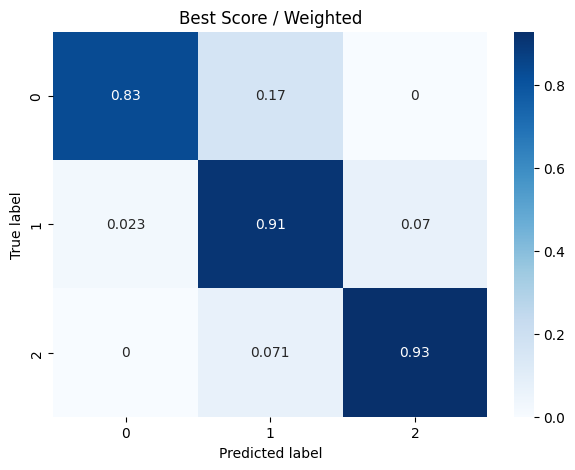

In [9]:
classifier.collision_strategy = "best_score"
classifier.null_strategy = "weighted"
y_pred_bs_w = classifier.predict(X_test, column_names)
print(y_pred_bs_w)
cm_bs_w = classifier.confusion_matrix(y_pred_bs_w, y_test)
pretty_print_confusion_matrix(cm_bs_w)
print("Score: ", classifier.score(y_pred_bs_w, y_test))
plot_confusion_matrix(np.array(cm_bs_w), classes=['0', '1', '2'], normalize=True, title='Best Score / Weighted')

[0, 0, 1, 0, 1, 0, 1, 2, 1, 1, 0, 2, 1, 2, 0, 1, 1, 1, 0, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 0, 0, 1, 2, 0, 1, 0, 2, 2, 1, 2, 0, 1, 1, 2, 2, 0, 1, 1, 2, 0, 1, 0, 1, 2, 2, 1, 1, 0, 1, 0, 2, 1, 1, 2, 0, 0, 0, 2, 1, 0, 0, 2, 1, 0, 2, 1, 0, 2, 1, 1, 0, 1, 0, 0, 1, 0, 0, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 0, 1, 2, 2, 2, 1, 0, 1, 2, 2]
[30, 6, 0]
[1, 39, 3]
[0, 2, 26]
Score:  0.8878504672897196


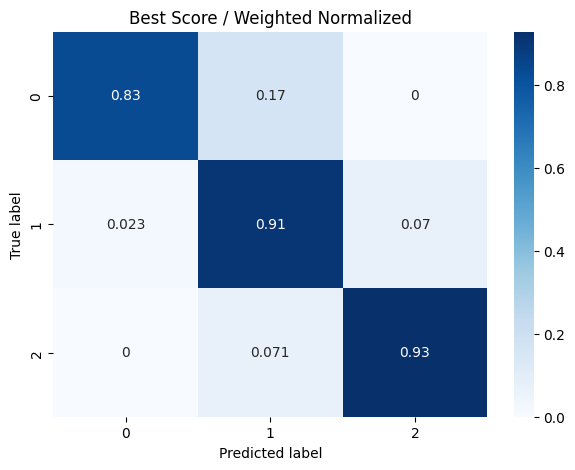

In [10]:
classifier.collision_strategy = "best_score"
classifier.null_strategy = "weighted_normalized"
y_pred_bs_wn = classifier.predict(X_test, column_names)
print(y_pred_bs_wn)
cm_bs_wn = classifier.confusion_matrix(y_pred_bs_wn, y_test)
pretty_print_confusion_matrix(cm_bs_wn)
print("Score: ", classifier.score(y_pred_bs_wn, y_test))
plot_confusion_matrix(np.array(cm_bs_wn), classes=['0', '1', '2'], normalize=True, title='Best Score / Weighted Normalized')

[0, 0, 2, 0, 1, 0, 1, 2, 1, 1, 0, 2, 1, 2, 0, 1, 1, 1, 0, 1, 0, 1, 1, 2, 2, 2, 1, 1, 1, 0, 0, 1, 2, 0, 1, 0, 2, 2, 1, 2, 0, 1, 1, 2, 2, 0, 1, 1, 2, 0, 1, 0, 1, 2, 2, 1, 1, 0, 1, 0, 2, 1, 1, 2, 0, 0, 0, 2, 1, 0, 0, 2, 1, 0, 2, 1, 0, 2, 1, 1, 0, 1, 0, 0, 1, 0, 0, 2, 1, 1, 1, 0, 1, 1, 1, 2, 2, 0, 1, 2, 2, 2, 1, 0, 1, 2, 2]
[32, 4, 0]
[1, 39, 3]
[0, 1, 27]
Score:  0.9158878504672897


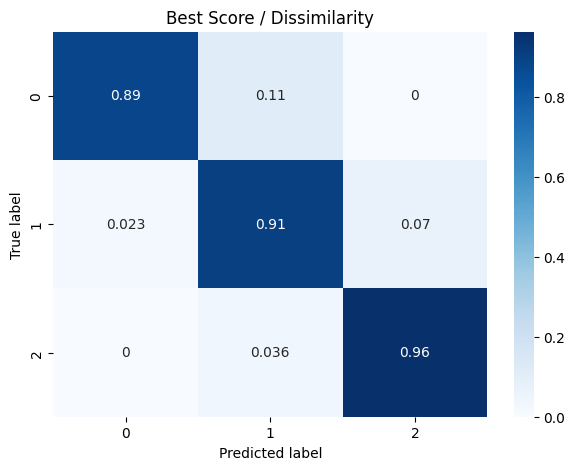

In [11]:
classifier.collision_strategy = "best_score"
classifier.null_strategy = "dissimilarity"
y_pred_bs_d = classifier.predict(X_test, column_names)
print(y_pred_bs_d)
cm_bs_d = classifier.confusion_matrix(y_pred_bs_d, y_test)
pretty_print_confusion_matrix(cm_bs_d)
print("Score: ", classifier.score(y_pred_bs_d, y_test))
plot_confusion_matrix(np.array(cm_bs_d), classes=['0', '1', '2'], normalize=True, title='Best Score / Dissimilarity')

[0, 0, 1, 0, 1, 0, 1, 2, 1, 1, 0, 2, 1, 2, 0, 1, 1, 1, 0, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 0, 0, 1, 2, 0, 0, 0, 2, 2, 1, 2, 0, 1, 1, 2, 2, 0, 1, 1, 2, 0, 1, 0, 0, 2, 2, 1, 1, 0, 1, 0, 2, 1, 1, 2, 0, 0, 0, 2, 1, 0, 0, 2, 1, 0, 2, 1, 0, 2, 1, 1, 0, 1, 0, 0, 1, 0, 0, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 0, 1, 2, 2, 2, 1, 0, 1, 2, 2]
[32, 4, 0]
[1, 39, 3]
[0, 2, 26]
Score:  0.9065420560747663


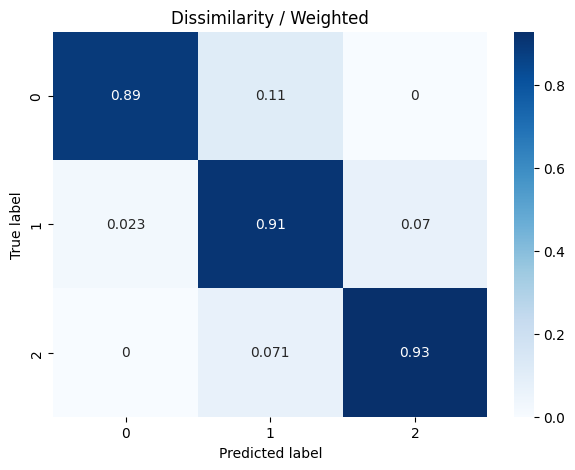

In [12]:
classifier.collision_strategy = "dissimilarity"
classifier.null_strategy = "weighted"
y_pred_d_w = classifier.predict(X_test, column_names)
print(y_pred_d_w)
cm_d_w = classifier.confusion_matrix(y_pred_d_w, y_test)
pretty_print_confusion_matrix(cm_d_w)
print("Score: ", classifier.score(y_pred_d_w, y_test))
plot_confusion_matrix(np.array(cm_d_w), classes=['0', '1', '2'], normalize=True, title='Dissimilarity / Weighted')

[0, 0, 1, 0, 1, 0, 1, 2, 1, 1, 0, 2, 1, 2, 0, 1, 1, 1, 0, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 0, 0, 1, 2, 0, 0, 0, 2, 2, 1, 2, 0, 1, 1, 2, 2, 0, 1, 1, 2, 0, 1, 0, 0, 2, 2, 1, 1, 0, 1, 0, 2, 1, 1, 2, 0, 0, 0, 2, 1, 0, 0, 2, 1, 0, 2, 1, 0, 2, 1, 1, 0, 1, 0, 0, 1, 0, 0, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 0, 1, 2, 2, 2, 1, 0, 1, 2, 2]
[32, 4, 0]
[1, 39, 3]
[0, 2, 26]
Score:  0.9065420560747663


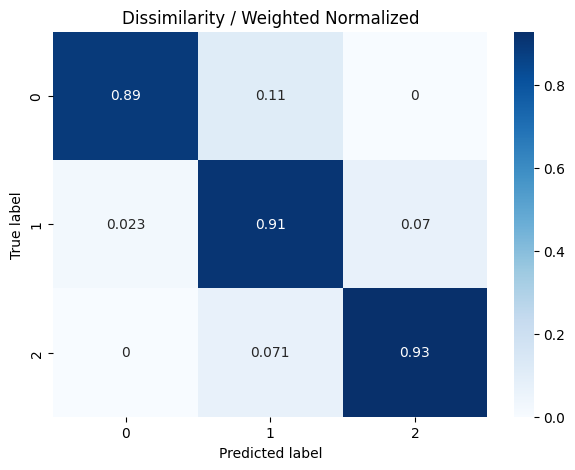

In [13]:
classifier.collision_strategy = "dissimilarity"
classifier.null_strategy = "weighted_normalized"
y_pred_d_wn = classifier.predict(X_test, column_names)
print(y_pred_d_wn)
cm_d_wn = classifier.confusion_matrix(y_pred_d_wn, y_test)
pretty_print_confusion_matrix(cm_d_wn)
print("Score: ", classifier.score(y_pred_d_wn, y_test))
plot_confusion_matrix(np.array(cm_d_wn), classes=['0', '1', '2'], normalize=True, title='Dissimilarity / Weighted Normalized')

[0, 0, 2, 0, 1, 0, 1, 2, 1, 1, 0, 2, 1, 2, 0, 1, 1, 1, 0, 1, 0, 1, 1, 2, 2, 2, 1, 1, 1, 0, 0, 1, 2, 0, 0, 0, 2, 2, 1, 2, 0, 1, 1, 2, 2, 0, 1, 1, 2, 0, 1, 0, 0, 2, 2, 1, 1, 0, 1, 0, 2, 1, 1, 2, 0, 0, 0, 2, 1, 0, 0, 2, 1, 0, 2, 1, 0, 2, 1, 1, 0, 1, 0, 0, 1, 0, 0, 2, 1, 1, 1, 0, 1, 1, 1, 2, 2, 0, 1, 2, 2, 2, 1, 0, 1, 2, 2]
[34, 2, 0]
[1, 39, 3]
[0, 1, 27]
Score:  0.9158878504672897


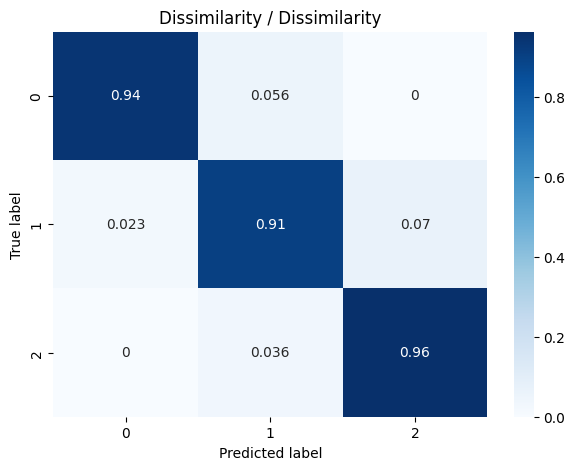

In [14]:
classifier.collision_strategy = "dissimilarity"
classifier.null_strategy = "dissimilarity"
y_pred_d_d = classifier.predict(X_test, column_names)
print(y_pred_d_d)
cm_d_d = classifier.confusion_matrix(y_pred_d_d, y_test)
pretty_print_confusion_matrix(cm_d_d)
print("Score: ", classifier.score(y_pred_bs_d, y_test))
plot_confusion_matrix(np.array(cm_d_d), classes=['0', '1', '2'], normalize=True, title='Dissimilarity / Dissimilarity')

In [15]:

for learning_class, model in classifier.model.items():
    print(f'Class: {learning_class}')
    print(f'Score: {model["score"]}')
    for i, clause in enumerate(model['oqat_model'].model.clauses):
        print(f'\t{model["cnf_weights"][i]: ^4} Clause: {clause}')

print(f' y_test   bs / w    bs / wn   bs / d      d / w    d / wn    d / d   sets')
for i in range(len(y_test)):
    print(f'{y_test[i]: ^9}', f'{y_pred_bs_w[i]: ^9}', f'{y_pred_bs_wn[i]: ^9}', f'{y_pred_bs_d[i]: ^9}', f'{y_pred_d_w[i]: ^9}', f'{y_pred_d_wn[i]: ^9}', f'{y_pred_d_d[i]: ^9}', f'{y_pred_set[i]}')

Class: 0
Score: 0.8636363636363636
	 28  Clause: ([774.81>=a13<1547.00])
	 4   Clause: ([13.43>=a1<14.83] ∨ [3.38>=a2<4.72] ∨ [a4<17.35] ∨ [a5<93.84] ∨ [2.14>=a6<2.97] ∨ [3.05>=a7<5.08] ∨ [2.43>=a9<3.58] ∨ [2.22>=a12<3.06] ∨ [1186.37>=a13<1547.00])
Class: 1
Score: 0.9090909090909091
	 23  Clause: ([a1<12.35] ∨ [a3<1.96] ∨ [a5<93.84] ∨ [1.29>=a11<1.71])
	 5   Clause: ([a2<2.21] ∨ [a3<1.96] ∨ [2.55>=a3<3.23] ∨ [a4<17.35] ∨ [22.86>=a4<28.50] ∨ [93.84>=a5<126.00] ∨ [2.97>=a6<3.88] ∨ [1.80>=a7<5.08] ∨ [a8<0.31] ∨ [2.43>=a9<3.58] ∨ [4.60>=a10<7.52] ∨ [0.86>=a11<1.71] ∨ [2.22>=a12<3.71] ∨ [774.81>=a13<1186.37])
	 2   Clause: ([a1<12.35] ∨ [2.21>=a2<4.72] ∨ [a3<1.96] ∨ [2.55>=a3<3.23] ∨ [17.35>=a4<28.50] ∨ [93.84>=a5<126.00] ∨ [a6<2.14] ∨ [a7<3.05] ∨ [0.46>=a8<0.63] ∨ [a9<2.43] ∨ [a10<4.60] ∨ [a11<0.86] ∨ [1.29>=a11<1.71] ∨ [a12<2.22] ∨ [3.06>=a12<3.71] ∨ [a13<774.81])
Class: 2
Score: 1.0
	 32  Clause: ([a12<2.22])
	 3   Clause: ([13.43>=a1<14.83] ∨ [2.21>=a2<4.72] ∨ [2.55>=a3<3.23] ∨ [22.86>=